In [62]:
import numpy as np
import pandas as pd
import scipy.stats as sps
from statsmodels.sandbox.stats.multicomp import multipletests

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3)
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Пример на дисперсионный анализ

Данные https://www.kaggle.com/ruslankl/mice-protein-expression

Уровни экспрессии 77 белков, измеренные в коре головного мозга 8 классов мышей, некоторые из которых с синдромом Дауна, подверженных контекстному обусловливанию страха, задача, используемая для оценки ассоциативного обучения.
Данные содержат информацию о 38 контрольных мышей и 34 трисомных мышей (синдром Дауна), то есть всего 72 мышки. Проведено 15 измерений каждого белка для каждой мышки.

Загружаем данные и смотрим на начало таблицы. Всего мы имеем 82 колонки, в большинстве их которых содержатся вещественные данные (уровни экспрессии 77 белков). Остальные колонки содержат категориальные данные (с небольшим числом значений).

In [3]:
data = pd.read_csv('./mice-protein-expression.zip')
data.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m


Простые описательные статистики по вещественным параметрам

In [4]:
data.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


Количество мышей по генотипам

In [9]:
data.Genotype.value_counts()

Control    570
Ts65Dn     510
Name: Genotype, dtype: int64

Визуализируем данные по некоторым белкам

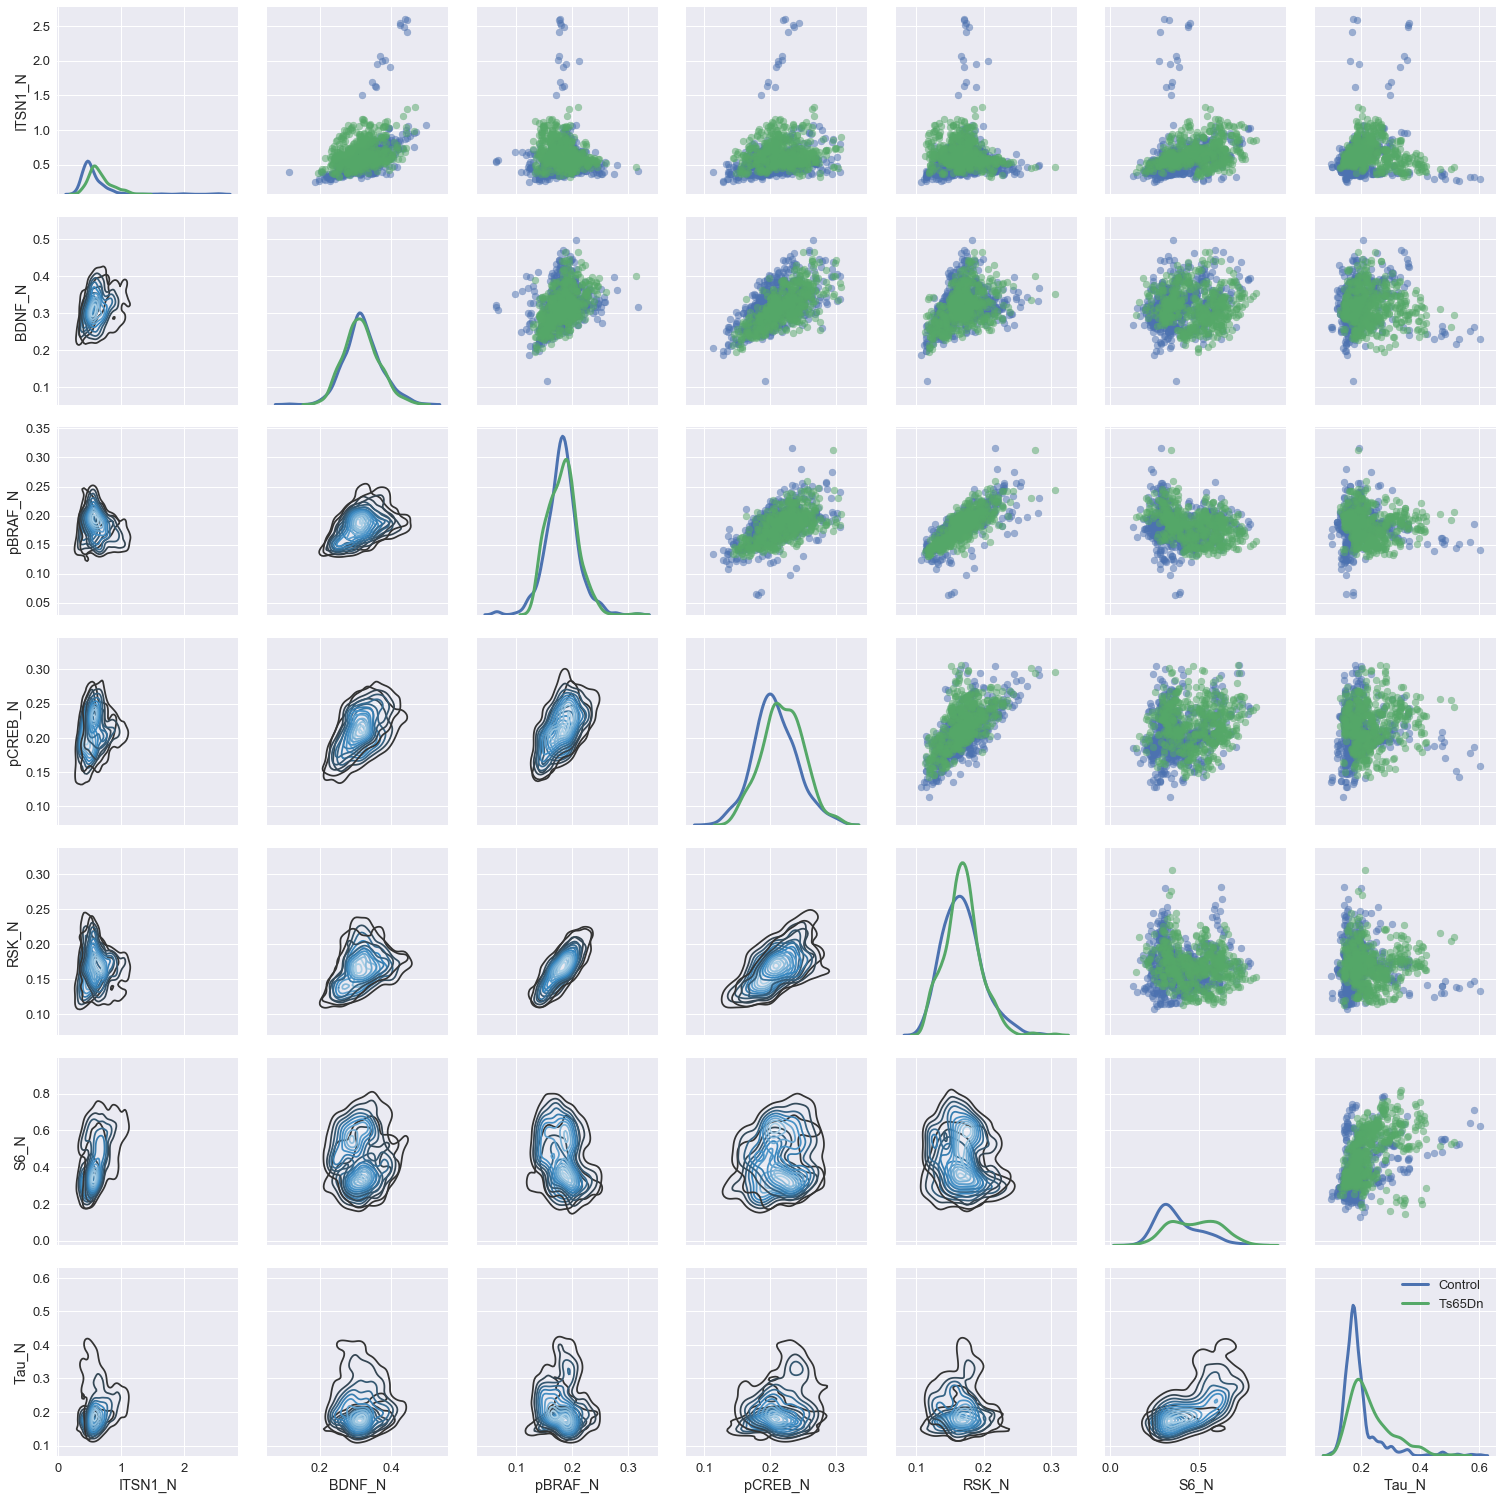

In [73]:
g = sns.PairGrid(data.iloc[:, [2, 3, 7, 9, 30, 49, 57, 78]].dropna(), 
                 size=3, hue='Genotype')
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter, alpha=0.5)
g.map_diag(sns.kdeplot, lw=3)
plt.legend();

#### Проверим гипотезу о равенстве распределений уровня экспрессии белка DYRK1A_N для двух генотипов.

С помощью ядерных оценок плотности посмотрим, как отличаются распределения DYRK1A_N для разных генотипов.

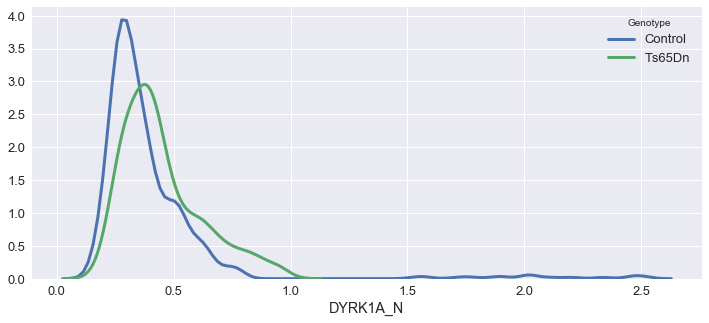

In [29]:
x = data[data['Genotype'] == 'Control']['DYRK1A_N']
y = data[data['Genotype'] == 'Ts65Dn']['DYRK1A_N']

plt.figure(figsize=(12, 5))
sns.kdeplot(x, label='Control', lw=3)
sns.kdeplot(y, label='Ts65Dn', lw=3)
plt.xlabel('DYRK1A_N')
plt.legend(title='Genotype');

По графику видо, что распределения разные. Критерий Уилкоксона-Манна-Уитни отвергает гипотезу
о равенстве распределений. Для наглядности приведены результаты критерия для разных альтернатив. В реальных исследованиях нужно использовать конкретную альтернативу.

In [30]:
sps.mannwhitneyu(x, y, alternative='two-sided'), \
sps.mannwhitneyu(x, y, alternative='greater'), \
sps.mannwhitneyu(x, y, alternative='less')

(MannwhitneyuResult(statistic=101725.0, pvalue=1.5303452997371036e-17),
 MannwhitneyuResult(statistic=101725.0, pvalue=1.0),
 MannwhitneyuResult(statistic=101725.0, pvalue=7.651726498685518e-18))

Оценка сдвига

In [25]:
W = (y[:, np.newaxis] - x[np.newaxis, :]).ravel()
shift = np.nanmedian(W)
print('Shift = %.3f' % shift)

Shift = 0.068


Доверительный интервал величины сдвига. По сравнению с формулами тут из индексов надо
вычесть 1, поскольку используется нумерация с нуля.

In [28]:
# всякие параметры для вычисления доверительного интервала
alpha = 0.05
n, m = len(x), len(y)
z = sps.norm.ppf(1 - alpha)
k = int(np.floor(n*m/2 - 0.5 - z * np.sqrt(n*m*(n+m+1)/12)))

W.sort()
print('Shift CI = (%.3f, %.3f)' % (W[k], W[n*m-k-1]))

Shift CI = (0.056, 0.082)


#### Проверим гипотезу о  равенстве распределений уровня экспрессии белка BDNF_N для двух генотипов.

С помощью ядерных оценок плотности посмотрим, как отличаются распределения BDNF_N для разных генотипов.

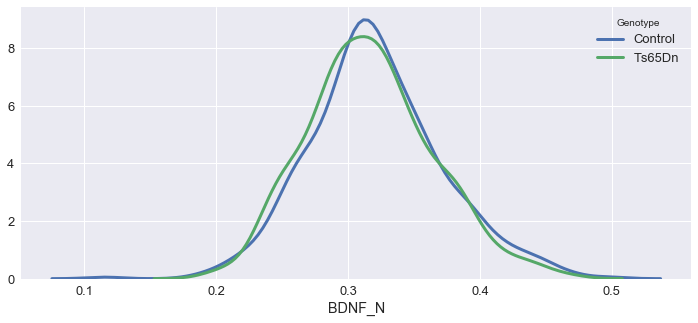

In [31]:
x = data[data['Genotype'] == 'Control']['BDNF_N']
y = data[data['Genotype'] == 'Ts65Dn']['BDNF_N']

plt.figure(figsize=(12, 5))
sns.kdeplot(x, label='Control', lw=3)
sns.kdeplot(y, label='Ts65Dn', lw=3)
plt.xlabel('BDNF_N')
plt.legend(title='Genotype');

Критерий Уилкоксона-Манна-Уитни не отвергает гипотезу
о равенстве распределений. Для наглядности приведены результаты критерия для разных альтернатив. В реальных исследованиях нужно использовать конкретную альтернативу.

In [32]:
sps.mannwhitneyu(x, y, alternative='two-sided'), \
sps.mannwhitneyu(x, y, alternative='greater'), \
sps.mannwhitneyu(x, y, alternative='less')

(MannwhitneyuResult(statistic=152167.0, pvalue=0.18284761646679482),
 MannwhitneyuResult(statistic=152167.0, pvalue=0.09142380823339741),
 MannwhitneyuResult(statistic=152167.0, pvalue=0.9086082927858418))

Оценка сдвига

In [33]:
W = (y[:, np.newaxis] - x[np.newaxis, :]).ravel()
shift = np.nanmedian(W)
print('Shift = %.3f' % shift)

Shift = -0.004


Доверительный интервал величины сдвига содержит ноль, что согласуется с тем, что критерий Уилкоксона-Манна-Уитни не отвергает гипотезу.

In [34]:
# всякие параметры для вычисления доверительного интервала
alpha = 0.05
n, m = len(x), len(y)
z = sps.norm.ppf(1 - alpha)
k = int(np.floor(n*m/2 - 0.5 - z * np.sqrt(n*m*(n+m+1)/12)))

W.sort()
print('Shift CI = (%.3f, %.3f)' % (W[k], W[n*m-k-1]))

Shift CI = (-0.009, 0.001)


Визуально распределения похожи на нормальное. Тем не менее критерий Шапиро-Уилка отвергает нормальность. Таким образом, на данных лучше не использовать методы, не устойчивые к некоторым отклонениям от нормальности.

In [22]:
sps.shapiro(x)

(0.9926453232765198, 3.458527135080658e-05)

Визуально на Q-Q plot точки в целом неплохо ложатся на прямую, но с небольшими отклонениями. Поэтому можно использовать методы, устойчивые к отклонениям от нормальности.


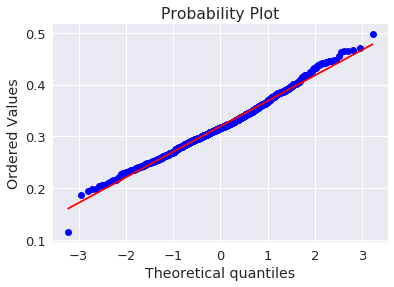

In [23]:
sps.probplot(x, plot=plt.subplot(111));

Попробуем применить критерий Стьюдента для проверки гипотезы о равенстве средних, который работает для нормальных выборок.
Этим критерием гипотеза о равенстве средних не отвергается.

In [36]:
sps.ttest_ind(x[~np.isnan(x)], y[~np.isnan(y)])

Ttest_indResult(statistic=1.440470979622491, pvalue=0.15002536864087548)

#### По каким белкам уровень эксрессии отличается по генотипам?

Задача заключается в том, чтобы среди всех белков отобрать для дальнейшего более подробного анализа те, по которым уровень экспрессии гена отличается по двум генотипам. Для решения задачи проверим гипотезы об однородности по генотипам для каждого белка.

In [60]:
testing_result = []

for j in range(1, 78):  # для каждого белков
    name = data.columns[j]
    
    # разделяем данные по генотипам
    x = data[data['Genotype'] == 'Control'][name]
    y = data[data['Genotype'] == 'Ts65Dn'][name]
    
    # применяем критерий Уилкоксона-Манна-Уитни
    testing_result.append([name] + list(sps.mannwhitneyu(x, y, alternative='two-sided')))
    
# оформляем в виде pandas-таблицы
testing_result = pd.DataFrame(testing_result, columns=['name', 'stats', 'pvalue'])

К результату нужно применить множественную проверку гипотез. Поскольку цель исследований -- отбор признаков для дальнейшего анализа, а статистики критериев зависимы (считаются на одних и тех же мышках), будем применять метод Бенджамини-Иекутиели.

In [68]:
is_reject, pvalue_corrected = multipletests(testing_result['pvalue'], method='fdr_by')[:2]
testing_result['pvalue_corrected'] = pvalue_corrected
testing_result['is_reject'] = is_reject

Итоговая таблица результатов. В последней колонке указано True, если гипотеза однородности отвергается для данного белка, т.е. для него есть значимое различие генотипов.

In [70]:
testing_result

,name,stats,pvalue,pvalue_corrected,is_reject
0,DYRK1A_N,101725.0,1.530345e-17,8.294855e-16,True
1,ITSN1_N,84198.0,6.504421e-33,1.233946e-30,True
2,BDNF_N,152167.0,1.828476e-01,1.000000e+00,False
3,NR1_N,159657.0,5.178941e-03,4.465866e-02,True
4,NR2A_N,168598.0,5.549015e-06,8.421575e-05,True
5,pAKT_N,134779.0,3.886421e-02,3.072034e-01,False
6,pBRAF_N,143642.5,7.387030e-01,1.000000e+00,False
7,pCAMKII_N,148024.0,6.013648e-01,1.000000e+00,False
8,pCREB_N,113998.0,8.982408e-10,2.272055e-08,True
9,pELK_N,129083.0,1.479377e-03,1.477110e-02,True
